In [1]:
import glob
import os
from six import string_types, text_type
import numpy as np
import scipy
from web.evaluate import evaluate_analogy

In [2]:
import pickle

In [51]:
idx2vec = pickle.load(open('../../data/wikipedia/save/experiment7prototypesmall/idx2vec.dat', 'rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess0.05B/idx2word.dat', 'rb'))

In [52]:
word2idx = pickle.load(open('../../data/wikipedia/preprocess0.05B/word2idx.dat', 'rb'))
wc = pickle.load(open('../../data/wikipedia/preprocess0.05B/wc.dat', 'rb'))

In [53]:
numerals = ['zero','one','two','three','four','five','six','seven','eight','nine','ten','eleven','twelve','thirteen','fourteen','fifteen','sixteen','seventeen','eighteen','nineteen','twenty','thirty','fifty','sixty','seventy','eighty','ninety']

In [54]:
def cosine_similarity(v1,v2):
    return np.dot(v1, v2)/(np.linalg.norm(v1)* np.linalg.norm(v2))

In [55]:
for n in numerals:
    print(n, '- word_count: ', wc[n])

zero - word_count:  3958
one - word_count:  105471
two - word_count:  75177
three - word_count:  38257
four - word_count:  23709
five - word_count:  15776
six - word_count:  11349
seven - word_count:  8029
eight - word_count:  6388
nine - word_count:  4670
ten - word_count:  6411
eleven - word_count:  1315
twelve - word_count:  2409
thirteen - word_count:  867
fourteen - word_count:  691
fifteen - word_count:  930
sixteen - word_count:  748
seventeen - word_count:  410
eighteen - word_count:  508
nineteen - word_count:  361
twenty - word_count:  3064
thirty - word_count:  1661
fifty - word_count:  1100
sixty - word_count:  547
seventy - word_count:  386
eighty - word_count:  408
ninety - word_count:  229


In [56]:
def compute_similarity(numerals):
    embedds = [idx2vec[word2idx[i]] for i in numerals]
    values = np.zeros((len(embedds), len(embedds)))
    for i in range(len(embedds)):
        for j in range(len(embedds)):
            values[i,j] = cosine_similarity(embedds[i], embedds[j])
    return values

In [57]:
values = compute_similarity(numerals)

In [58]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

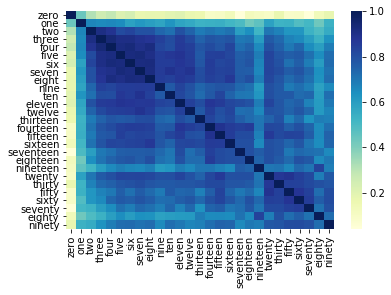

In [59]:
# draw heatmap
sns.heatmap(values, xticklabels=numerals, yticklabels=numerals, annot=False, fmt=".2f",cmap="YlGnBu")

In [60]:
idx2vec = pickle.load(open('../../data/wikipedia/save/experiment8nonesmall/idx2vec.dat', 'rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess0.05B/idx2word.dat', 'rb'))

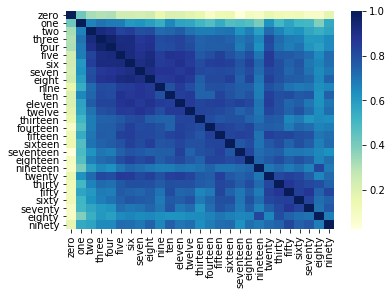

In [61]:
values_1 = compute_similarity(numerals)
sns.heatmap(values_1, xticklabels=numerals, yticklabels=numerals, annot=False, fmt=".2f",cmap="YlGnBu")

In [63]:
diff = values - values_1

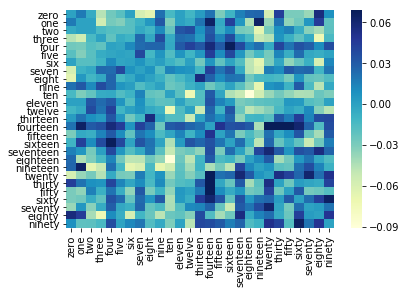

In [65]:
sns.heatmap(diff, xticklabels=numerals, yticklabels=numerals, annot=False, fmt=".2f",cmap="YlGnBu")

In [66]:
# bottom right - higher similarity, top left - smaller similarity - top right & bottom left, smaller?

In [69]:
l, _ = values.shape

In [74]:
smallgrid = np.zeros((2,2))

In [75]:
smallgrid[0,0] = np.mean(diff[:l//2,:l//2])
smallgrid[0,1] = np.mean(diff[:l//2,l//2:])
smallgrid[1,0] = np.mean(diff[l//2:,:l//2])
smallgrid[1,1] = np.mean(diff[l//2:,l//2:])

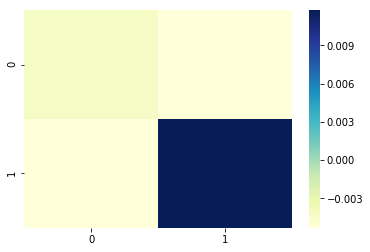

In [76]:
sns.heatmap(smallgrid, annot=False, fmt=".2f",cmap="YlGnBu")